# <font color='#5B7675'>Creating and Editing ArcGIS StoryMaps using the ArcGIS API for Python</font>
 All information on using the new StoryMap object class can be found at:
   <font color='#0077BD'>https://developers.arcgis.com/python/api-reference/arcgis.apps.storymap.html</font>
   
If you are new to jupyter notebook you can use the shortcut SHIFT+ENTER to run through the cells in the notebook one-by-one.
* `In [*]` indicates a cell is still running.
* When a step completes you should see a number appear for the In[#] cell 
   
   <font color= "#9F52AD">It's recommended that you run cells only once since you can easily add extra pieces to an ArcGIS StoryMap. If you get stuck, just restart the kernel above and go through the cells in order again.
    
   <strong><font color ="#288134">Text with this color notes cell input from you.

## <font color = '#001F1E'> Versioning and Imports

Before getting started, make sure you are using the arcgis api version 2.0.0 or higher. 
    
<font color = '#9F52AD'>Please be patient running the code cell below this can take a several minutes to complete.

In [1]:
!conda install arcgis>=2.0.0 --yes
#Ignore conda version warnings



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
import arcgis
print(arcgis.__version__)

2.0.0


Now that we are on a relevant API version we can go ahead and import some of the packages we will use to work with ArcGIS StoryMaps through the python API. The new additions for this version of the API are:

`arcgis.apps.storymaps.story` - Contains the StoryMaps object that allows us to work directly with StoryMap Item

`arcgis.apps.storymaps.story_content` - Contains the content types currently supported for Storymaps

Supported Content Types: Image, Video, Audio, Embed, Map, Text, Button, Gallery, Swipe, Sidecar and Timeline

<font color="#D43121">Note: `Sidecar` only supports editing existing sidecar blocks at this time </font>

In [3]:
from arcgis.gis import GIS
from arcgis.apps.storymap.story import StoryMap
from arcgis.apps.storymap.story_content import Image, TextStyles, Video, Audio, Embed, Map, Text, Button, Gallery, Swipe, Sidecar, Timeline
from arcgis.gis import Item

Now use the `GIS` module to login to your GIS instance:

<strong><font color ="#288134"> If you are using this notebook in your local env, the following GIS initiation might not work for you. Please refere to the documentation here for troubleshooting:
    https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#gis

In [4]:
%%capture
#%% capture surpresses cell output
gis = GIS('home')

## <font color = '#001F1E'> Create your StoryMap
    
<font color= "#9F52AD">If you are planning to edit an existing ArcGIS StoryMap, you can create the the StoryMap object using the ArcGIS StoryMap itemid eg. StoryMap('012345678910ABCEDEFGHIJKL18192021')</font>

For now,  we can create a new story in our ArcGIS content by using the `StoryMap` class.

In [5]:
my_story = StoryMap()
my_story

{"root": "n-4xkUEe", "nodes": {"n-4xkUEe": {"type": "story", "data": {"storyTheme": "r-vlc4Kp"}, "config": {"coverDate": "first-published", "storyLocale": "en-US"}, "children": ["n-aTn8ak", "n-1AItUD", "n-cOeTah"]}, "n-aTn8ak": {"type": "storycover", "data": {"type": "minimal", "title": "", "summary": "", "byline": null, "titlePanelPosition": "start"}}, "n-1AItUD": {"type": "navigation", "data": {"links": []}, "config": {"isHidden": true}}, "n-cOeTah": {"type": "credits"}}, "resources": {"r-vlc4Kp": {"type": "story-theme", "data": {"themeId": "summit", "themeBaseVariableOverrides": {}}}}}

That was easy, and we could stop here... but that would be no fun.

## <font color = '#001F1E'> Editing the StoryMap cover

Now we can explore the ‘nodes’ of the newly created story. 

<font color= "#9F52AD">Nodes are a way to keep track of specific content blocks within ArcGIS StoryMaps.</font>

In [6]:
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-cOeTah': 'credits'}]

Above we can see that a newly created story contains 3 nodes corresponding to:

* `storycover`
* `navigation`
* `credits`

These nodes are required for a functioning story.

Using the `my_story` object we can edit these nodes directly.

We will focus on the cover. First, let us explore what currently resides in the cover attribute

In [7]:
#the current cover
my_story.cover()

{'type': 'storycover',
 'data': {'type': 'minimal',
  'title': '',
  'summary': '',
  'byline': None,
  'titlePanelPosition': 'start'}}

Above we can see that the story cover contains data for type, title, summary and byline:
These can be modified by using the `.cover()` method and passing the correct arguments, as shown in the cell below
<br>
<font color= "#9F52AD">   
For type three possible are accepted, corresponding to option in the website design panel:
    
- `minimal`
- `sidebyside`
- `full`
<font>

In [8]:
#To update the title we can use the cover method and pass arguments
my_story.cover(type='full', \
               title="This is a example of the python API",\
               summary='for all the pythonic authors out there',\
               by_line='The StoryMaps Team')

{'type': 'storycover',
 'data': {'type': 'full',
  'title': 'This is a example of the python API',
  'summary': 'for all the pythonic authors out there',
  'byline': 'The StoryMaps Team',
  'titlePanelPosition': 'start'}}

### <font color = '#001F1E'> Saving your Story
    
<font color ="#9F52AD"> Please note that when publishing/saving using the python api, the story will be republished on first viewing, this allows us to do some additional checks/processing for your story.</font>
   
        
Let's save our story.

In [9]:
my_story.save(publish=True)

<Item title:"StoryMap via Python 99b270699d" type:StoryMap owner:rudi.storymaps>

Open the story at https://storymaps.arcgis.com/stories , it will be named 'StoryMap via Python ##########'.

Go check it out now, and notice that the title, summary and byline reflect the changes we made above.

Don't change anything using the story builder at this time. If you do, you might affect your ability to follow along with the rest of this demo.


### <font color = '#001F1E'> Adding and Image to the Cover

This is great, but usually we would want to add an image to our story cover.

To add an image to the cover using the python api we will first have to create a `image` object.
We can then add this Image to the cover using the image parameter

In [10]:
#the path used here points to a resource on the esri REST server.
my_cover_image = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/2fcc801c983a402eb427dd5cd07ee759/data')
my_cover_image

now we can add the my_cover_image to the cover using the image parameter of `.cover()`

In [11]:
my_story.cover(image=my_cover_image)

{'type': 'storycover',
 'data': {'type': 'full',
  'title': 'This is a example of the python API',
  'summary': 'for all the pythonic authors out there',
  'byline': 'The StoryMaps Team',
  'titlePanelPosition': 'start'},
 'children': ['n-080ca3']}

Notice the image has been added as the child node <strong>n-######</strong> in the cover data above.

## <font color = '#001F1E'> Adding/Editing Text in our StoryMap

Okay, now we want to add a mission statement to our story. This can be done using `text` objects along with `TextStyles`. The `TexStyles` correspond to the different text block types available on the web:
    
* PARAGRAPH
* LARGEPARAGRAPH
* BULLETLIST
    <font color ="#9F52AD">* For bulleted lists one needs to pass a string containing all each list item in a sepererate `<li>` tag eg.
    '`<li>`item1`</li>``<li>`item2`</li>`'</font>
* NUMBERLIST
    <font color ="#9F52AD">* See comment for bulleted lists above</font>
* HEADING
* SUBHEADING
* QUOTE


below we create two text blocks, one for our mission statement heading and one for the paragraph. Notice that the default text style is PARAGRAPH and does need to be specified during creation

In [12]:
mission_heading_text = Text(text='Our Mission Statement', style=TextStyles.HEADING)
mission_paragraph = Text(text='Our mission desrciption with more information about our goals')

#now we add them to the story

my_story.add(mission_heading_text)
my_story.add(mission_paragraph)

'n-40c12a'

<strong><font color ="#288134">The output above is the last Text Node we added( this is the paragraph node). copy this to your clipboard, you will need it soon</font></strong>


Lets have a look at our story nodes to see if the text blocks were added successfully

In [13]:
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-ec806c': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f57d9d0>},
 {'n-40c12a': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f57db50>},
 {'n-cOeTah': 'credits'}]

Awesome, but what happens if our ideas shift a little and we want to update our text node containing our mission statement?

In this case we use the `StoryMap.get()` method to obtain the text node we want to change. This returns a `text` object, and we can then change the text property.

<font color ="#9F52AD">You could use the `.text()` method for the `mission_paragraph` object declared above, but for demonstration purposes we'll use the `.get()` method</font>

<strong><font color ="#288134">Paste the node identifier of the paragraph node obtained earlier in the get method below</font></strong> 


In [14]:
text_block_to_change = my_story.get('n-40c12a')
text_block_to_change.properties

{'node_dict': {'type': 'text',
  'data': {'type': 'paragraph',
   'text': 'Our mission desrciption with more information about our goals',
   'customTextColors': ['000']}}}

Okay we definitely have the correct node. Now we can change the text using `.text()`

In [15]:
text_block_to_change.text='Mission statement with new goals'

Looking at the node properties for the text node in our story object we can confirm the change.

<strong><font color ="#288134">Paste the node identifier of the paragraph node obtained earlier in the get method below</font></strong> 

In [16]:
my_story.get('n-40c12a').properties

{'node_dict': {'type': 'text',
  'data': {'type': 'paragraph',
   'text': 'Mission statement with new goals',
   'customTextColors': ['000']}}}

## <font color = '#001F1E'> Adding Embeds to a ArcGIS StoryMap

Next up, we want to embed a social media post in our story.

<font color ="#9F52AD">Embeds within storymaps can have one of 4 types. The default type is `link`, and this cannot currently be set during creation.<br>
If an embed is not working for you try changing to one of the other types based on the nature of your content:
    
* `video` - for video embeds from services like Vimeo and YouTube
* `photo` - embeds from services like Flickr
* `rich` - more complex embed types like social media posts from Twitter or Instagram
</font>

In the example below we are going to add a tweet and show you how to change the type.


In [17]:
#create the embed
twitter_embed = Embed(path='https://twitter.com/Esri/status/1490705717745098762')
twitter_embed

In [19]:
#add embed to the story
my_story.add(twitter_embed)

Exception: This node already exists. Please try updating instead.

<strong><font color ="#288134">Please make a note or copy of the node desciptor above, you will need it soon</font></strong>

To change the type of embed we want to change the object properties.

Lets have a look at what they currently are

In [20]:
#view properties
twitter_embed.properties

{'node_dict': {'type': 'embed',
  'data': {'url': 'https://twitter.com/Esri/status/1490705717745098762',
   'embedType': 'link',
   'title': 'twitter.com',
   'description': '',
   'providerUrl': 'twitter.com',
   'alt': '',
   'display': None}}}

We want to change the type to `rich` since this is a social media post. to do that change the `embedType` as follows:

In [21]:
twitter_embed.properties['node_dict']['data']['embedType'] = 'rich'

While we were busy doing this it became apparent that we would rather move the social media embed to the first block position in our story. In this way it is the first thing the reader will see.

We can move our existing node using the `StoryMap.move()` method, to move the specified node to a node location based on the index(zero-indexed) of nodes in the story.

Let's explore the current positions with nodes attribute:

In [22]:
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-ec806c': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f5da690>},
 {'n-40c12a': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f5da6d0>},
 {'n-d0cd84': <arcgis.apps.storymap.story_content.Embed at 0x7f7c4f5da710>},
 {'n-cOeTah': 'credits'}]

## <font color = '#001F1E'> Moving nodes around

Based on the nodes above we want to move the Embed node to index position 2. This is currently the location of one of our text nodes.

<font color="#D43121">Do not move your nodes above the navigation or storycover nodes. Navigation and storycover should always be first</font>

<strong><font color ="#288134">Use the Node descriptor <em>n-######</em> for the arcgis.apps.storymap.story_content.Embed node above in the code section below </font></strong>

In [23]:
my_story.move('n-d0cd84',2)

By looking at our story object we can see our embed node was moved to the correct location

In [24]:
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-d0cd84': <arcgis.apps.storymap.story_content.Embed at 0x7f7c4f5d7110>},
 {'n-ec806c': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f5d7150>},
 {'n-40c12a': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f5d7190>},
 {'n-cOeTah': 'credits'}]

## Adding a Gallery

Now we want to add some interesting images to a gallery within our story.

This can be achieved by adding several `Image` objects to a `gallery`. 

<font color="#D43121">It is important to note that the Gallery object needs to be placed into the story before images can be added to the Gallery.</font> 

In [25]:
new_gallery = Gallery(caption='Some important places')
my_story.add(new_gallery)

'n-d5f8cd'

Now that the gallery has been added to the story, we obtained a node designator and we can add Images to the gallery object.

First we create the Image objects

In [26]:
#all images added from shared rest source
image_a = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/564f196d020b4d489be555de183beb69/data')
image_b = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/caede7031a62459f947b1900bbe78b1a/data')
image_c = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/6878202fe5474292b0992820db363653/data')
image_d = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/bfa68f7bcf364e0dbc73501d59594dc6/data')
image_e = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/2dbb4db584b84f17b3952528e7426670/data')
image_f = Image(path='https://story.maps.arcgis.com/sharing/rest/content/items/5127b3bd2a814e0a8a4aedcacc1a9beb/data')

and then we pass these `image` objects as a list to the `Gallery.add_images` method

In [27]:
new_gallery.add_images([image_a,image_b,image_c,image_d,image_e,image_f])

['n-0e0dc6', 'n-83fa37', 'n-5bfc7d', 'n-79ab0b', 'n-49d87c', 'n-f10017']

We can view images in a Gallery node with `Gallery.properties`

In [28]:
new_gallery.properties

{'node_dict': {'type': 'gallery',
  'data': {'galleryLayout': 'jigsaw', 'caption': '', 'alt': ''},
  'children': ['n-0e0dc6',
   'n-83fa37',
   'n-5bfc7d',
   'n-79ab0b',
   'n-49d87c',
   'n-f10017']}}

<font color ="#9F52AD">From the above properties we can see galleries have a `galleryLayout` property. These properties can be used so set the layout of our gallery to match the types available on the web (similar to what we just did for the twitter post above). The gallery types for use are:

* `jigsaw`
* `square-dynamic`

</font>


## Adding/Changing webmaps in the ArcGIS StoryMap

Let's finish up this story by adding a web map using a `Map` object.

We add the map as a `gis.Item()` using the map’s `itemid`.

In [29]:
new_map = Map(Item(gis=gis, itemid='5d3a5da11c464486be1771a1ddf72528'))

In [30]:
my_story.add(new_map)

'n-9abb8d'

If the map changes further down the line we can easily update the map attribute of the node. As shown below.

<Item title:"Esri Nederland Content-viewer map" type:Web Map owner:Esri_NL_Content>
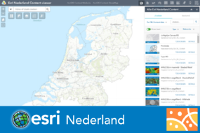

In [31]:
#current map
new_map.map

In [32]:
#add the new map id to the map attribute
new_map.map = '7aea6fa913a94176a1074edb40690318'

<Item title:"Topo RD" type:Web Map owner:Esri_NL_Content>
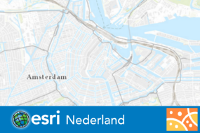

In [33]:
#updated map
new_map.map

what does our story structure look like currently?

In [34]:
#current story structure
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-d0cd84': <arcgis.apps.storymap.story_content.Embed at 0x7f7c4fde8950>},
 {'n-ec806c': <arcgis.apps.storymap.story_content.Text at 0x7f7c4fde8910>},
 {'n-40c12a': <arcgis.apps.storymap.story_content.Text at 0x7f7c4fde88d0>},
 {'n-d5f8cd': <arcgis.apps.storymap.story_content.Gallery at 0x7f7c4fde8890>},
 {'n-9abb8d': <arcgis.apps.storymap.story_content.Map at 0x7f7c4fde8810>},
 {'n-cOeTah': 'credits'}]

## <font color = '#001F1E'> Deleting Nodes

What happens if we want to delete a specific node?

In that case we get the node using the `get()` method and then each node has a `.delete()` method.

As shown below for deleting one of the nodes.

<strong><font color ="#288134">Use the Node descriptor <em>n-######</em> for one of the text nodes listed above to get and delete that node in the code below</font></strong>

In [35]:
node_to_delete = my_story.get('n-40c12a')
node_to_delete.delete()

True

To check that the story structure doesn't have that text node anymore we can confirm with `.nodes` again

In [36]:
#story with deleted node
my_story.nodes

[{'n-aTn8ak': 'storycover'},
 {'n-1AItUD': 'navigation'},
 {'n-d0cd84': <arcgis.apps.storymap.story_content.Embed at 0x7f7c4f9227d0>},
 {'n-ec806c': <arcgis.apps.storymap.story_content.Text at 0x7f7c4f9220d0>},
 {'n-d5f8cd': <arcgis.apps.storymap.story_content.Gallery at 0x7f7c4f9228d0>},
 {'n-9abb8d': <arcgis.apps.storymap.story_content.Map at 0x7f7c4f922a10>},
 {'n-cOeTah': 'credits'}]

## Saving A StoryMap

Awesome! now let's save this story and get it out of the door.

To do that we just save with publish set to true.

<font color ="#9F52AD"><strong>It is currently recommended that you open a story in builder after publishing it for the first time and after any changes are published. By doing this, the builder perfoms some additional optimizations for your story. This recommendation will be removed in later versions of the API as its capabilites are enhanced.</strong>
    
Click on the link in the card provided in output to go to the story in arcgis content, or navigate to the following to view your stories and click on the new story.
    <font color='#0077BD'>https://storymaps.arcgis.com/stories </font>
    

In [37]:
my_story.save(publish=True)

<Item title:"StoryMap via Python 99b270699d" type:StoryMap owner:rudi.storymaps>